# Linear regression

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/Users/claudiacarvalho/Data/data_analytics/Week_08


## Import the apartment data

In [2]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'mean_taxable_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched_cleaned.csv", 
                      sep=";", 
                      encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

print('rows: ', df.shape[0], ' columns: ', df.shape[1])
df.head(5)

rows:  722  columns:  17


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49,0,1441,29.41,47.252171,8.845797,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",3.0,111,0,2600,23.42,47.252087,8.854919,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",3.0,58,0,1490,25.69,47.253670,8.853993,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",4.0,118,0,3240,27.46,47.259834,8.851705,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",3.0,66,0,1450,21.97,47.266113,8.866872,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,974.844209


## Simple linear regression (only one explanatory variable in the model)
For details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [3]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['area'], 
                                                    df['price'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
503    120
6       65
400     90
644     63
484     91
Name: area, dtype: int64 

y_train:
503    1900
6      1850
400    2090
644    2102
484    1800
Name: price, dtype: int64


### Fit the simple linear regression model

In [4]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            1272.94
Slope of regression line (beta):          13.548
p-value:                                  0.0000
R-squared (coefficient of determination): 0.3678


### Plot regression line

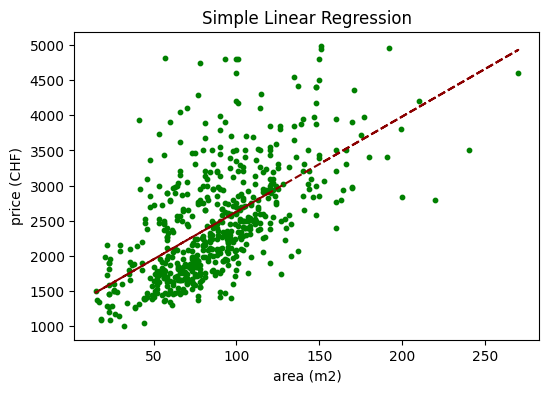

New Linear regression result with rooms as explanatory variable:
Intercept with y-axis (alpha):            52.96
Slope of regression line (beta):          -6.282
p-value:                                  0.0000
R-squared (coefficient of determination): 0.3116
Is the new R-squared value higher? No


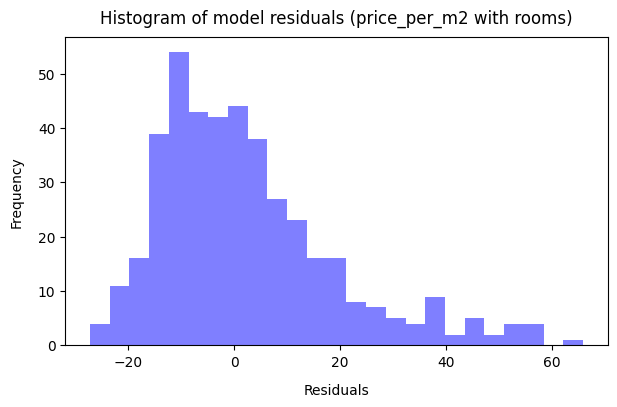

Are the residuals normally distributed? No


In [5]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')

plt.show()

# Create a new simple linear regression model with price_per_m2 as target variable and rooms as the explanatory variable
X_train_rooms, X_test_rooms, y_train_rooms, y_test_rooms = train_test_split(df['rooms'], 
                                                                            df['price_per_m2'], 
                                                                            test_size=0.20, 
                                                                            random_state=42)

# Fit the new regression model
slope_rooms, intercept_rooms, r_rooms, p_rooms, std_err_rooms = stats.linregress(X_train_rooms, y_train_rooms)

# Print results of the new regression model
print('New Linear regression result with rooms as explanatory variable:')
print(f'Intercept with y-axis (alpha):            {intercept_rooms:.2f}')
print(f'Slope of regression line (beta):          {slope_rooms:.3f}')
print(f'p-value:                                  {p_rooms:.4f}')
print(f'R-squared (coefficient of determination): {r_rooms**2:.4f}')

# Check if the R-squared value is higher compared to the original model
print(f'Is the new R-squared value higher? {"Yes" if r_rooms**2 > r**2 else "No"}')

# Calculate model residuals for the new model
mymodel_rooms = pd.Series(map(lambda x: slope_rooms * x + intercept_rooms, X_train_rooms))
residuals_rooms = y_train_rooms - mymodel_rooms

# Plot histogram of residuals for the new model
fig = plt.figure(figsize=(7,4))
n, bins, patches = plt.hist(x=residuals_rooms, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('Residuals', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals (price_per_m2 with rooms)', fontsize=12, pad=10)

# Show plot
plt.show()

print(f'Are the residuals normally distributed? {"Yes" if stats.shapiro(residuals_rooms).pvalue > 0.05 else "No"}')


### Check model residuals (residuals = observed prices minus predicted prices)

In [6]:
# Calculate model residuals for train data
residuals = y_train - mymodel

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 2898.72
1st Observed price in dataset: 1441.00
1st Residual price in dataset: -1457.72


### Plot histogram of residuals

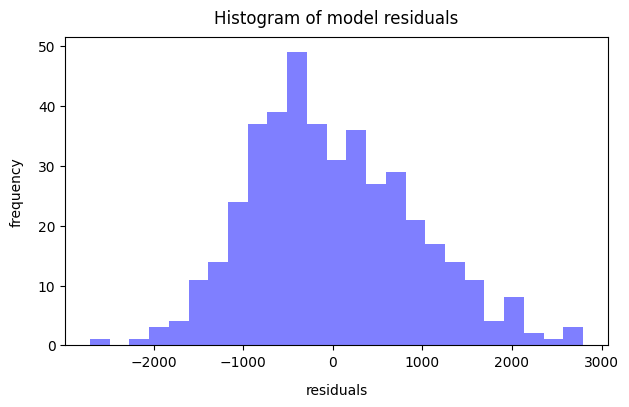

In [7]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Show plot
plt.show()

### Compare the observed prices with the predicted prices

In [8]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print('Observed price: ', y_test.iloc[i].round(2), ' Predicted price: ', predicted.iloc[i].round(2))


Observed price:  1360  Predicted price:  2031.64
Observed price:  1640  Predicted price:  2004.54
Observed price:  1568  Predicted price:  2167.12
Observed price:  2290  Predicted price:  2207.76
Observed price:  4950  Predicted price:  2627.75
Observed price:  1787  Predicted price:  2248.41
Observed price:  3495  Predicted price:  2519.37
Observed price:  2450  Predicted price:  2031.64
Observed price:  3390  Predicted price:  2871.62
Observed price:  2836  Predicted price:  2573.56


## Multiple linear regression (more than one explanatory variable in the model)
For details see: https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [9]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['area',
                                                            'pop_dens']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

# Include additional variables in the model
X2_train = df[['area', 'pop_dens', 'mean_taxable_income', 'dist_supermarket']]
X2_test = df[['area', 'pop_dens', 'mean_taxable_income', 'dist_supermarket']]

# Create train and test samples
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_train, 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Add constant to the model
X2_train_const = sm.add_constant(X2_train)
X2_test_const = sm.add_constant(X2_test)

# Create the multiple regression model
olsmod = sm.OLS(y2_train, X2_train_const)
olsres = olsmod.fit()

print(olsres.summary())

# Check if the variables are statistically significant
significant_vars = olsres.pvalues[olsres.pvalues < 0.05]
print(f'Statistically significant variables at 5% significance level: {significant_vars.index.tolist()}')

X2_train:
     area     pop_dens
503   120   165.018625
6      65   525.662252
400    90   424.146342
644    63  1044.628957
484    91   399.525129 

y2_train:
503    1900
6      1850
400    2090
644    2102
484    1800
Name: price, dtype: int64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     225.0
Date:                Sat, 13 Dec 2025   Prob (F-statistic):          6.98e-116
Time:                        16:08:40   Log-Likelihood:                -4403.2
No. Observations:                 577   AIC:                             8816.
Df Residuals:                     572   BIC:                             8838.
Df Model:                           4                                         
Covariance Type:            nonrobust      

### Fit the multiple regression model (yes, the output is rich :-), but we need only part of it for interpretation!)

In [10]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     225.0
Date:                Sat, 13 Dec 2025   Prob (F-statistic):          6.98e-116
Time:                        16:08:43   Log-Likelihood:                -4403.2
No. Observations:                 577   AIC:                             8816.
Df Residuals:                     572   BIC:                             8838.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -386.2135    

### Interpretation of the relevant (in this course) statistics in the table above

<b>R-squared:</b> This is the coefficient of determination (see slides of lessons). A value of 0.522 means, that the explanatory variables explain 52% of the variaton of our target variable (rental prices) - not bad, but could be improved.

<b>coef:</b> These are the estimated coefficients of the explanatory variables ('slopes of the regression line' of each variable). These are nedded for the price predictions in our model.

<b>P>|t|:</b> These are the p-values. If < 0.05, the explanatory variables shows a statistically siginificant (5% significance level) contribution in explaining the target variable. Except for the distiance to the nearest supermarkt, all variables are significant here.

### Plot histogram of residuals

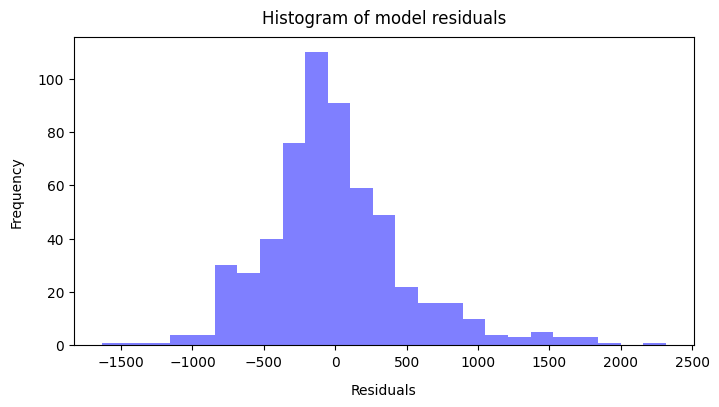

In [11]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('Residuals', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

### Compare the observed prices with the predicted prices

In [12]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed price: {y_test.iloc[i]:.1f}, Predicted price: {predicted_new.iloc[i]:.1f}')

Observed price: 1360.0, Predicted price: 1660.8
Observed price: 1640.0, Predicted price: 1542.6
Observed price: 1568.0, Predicted price: 1808.3
Observed price: 2290.0, Predicted price: 2720.3
Observed price: 4950.0, Predicted price: 3321.1
Observed price: 1787.0, Predicted price: 2272.2
Observed price: 3495.0, Predicted price: 3121.7
Observed price: 2450.0, Predicted price: 2491.4
Observed price: 3390.0, Predicted price: 2736.0
Observed price: 2836.0, Predicted price: 2312.0


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [13]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 24.6.0
Datetime: 2025-12-13 16:08:48
Python Version: 3.14.0
-----------------------------------
